In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from util.model_eval import predict_and_score

In [2]:
models = ["XGBoost", "Naive Bayes", "Neural Net"]
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

In [3]:
# Load the model from the file
xgb_model = joblib.load('models/xgboost/xbg_model.joblib')
xgb_test_features = joblib.load('models/xgboost/test_features.joblib')
xgb_test_targets = joblib.load('models/xgboost/test_targets.joblib')

report, score = predict_and_score(xgb_model, xgb_test_features, xgb_test_targets)

precisions.append(report[0][1])
recalls.append(report[1][1])
f1_scores.append(report[2][1])
roc_auc_scores.append(score)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7060
           1       0.60      0.44      0.51      1940

    accuracy                           0.82      9000
   macro avg       0.73      0.68      0.70      9000
weighted avg       0.80      0.82      0.80      9000

ROC-AUC Score: 0.7682076312023598


In [4]:
nb = joblib.load('models/naive_bayes/naive_bayes_ensemble.joblib')
nb_test_features = joblib.load('models/naive_bayes/test_features.joblib')
nb_test_targets = joblib.load('models/naive_bayes/test_targets.joblib')

report, score = predict_and_score(nb, nb_test_features, nb_test_targets)

precisions.append(report[0][1])
recalls.append(report[1][1])
f1_scores.append(report[2][1])
roc_auc_scores.append(score)



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.35      0.45      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

ROC-AUC Score: 0.7101196760302312


In [5]:
ann = joblib.load('models/neural_net/ann_model.joblib')
ann_test_features = joblib.load('models/neural_net/test_features.joblib')
ann_test_targets = joblib.load('models/neural_net/test_targets.joblib')

report, score = predict_and_score(ann, ann_test_features, ann_test_targets)

precisions.append(report[0][1])
recalls.append(report[1][1])
f1_scores.append(report[2][1])
roc_auc_scores.append(score)

# The following messages are not errors.

2024-12-08 12:54:55.672491: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


  1/188 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step

/Users/omar/miniconda3/envs/credit_card_defaults_prediction/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4673
           1       0.45      0.60      0.52      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.75      0.76      6000

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
ROC-AUC Score: 0.7524442955095982


In [6]:
def plot_comparison(metric_values, metric_name):
    plt.figure(figsize=(8, 6))
    plt.bar(models, metric_values)
    plt.title(f'{metric_name} Comparison Across Models')
    plt.ylabel(metric_name)
    plt.ylim(0, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

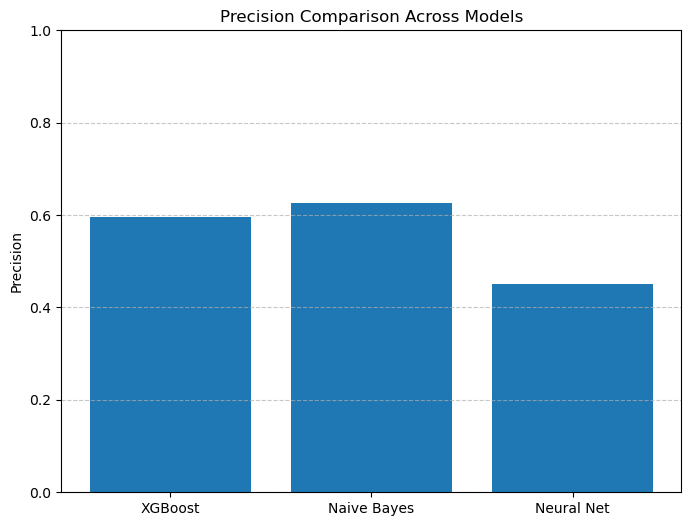

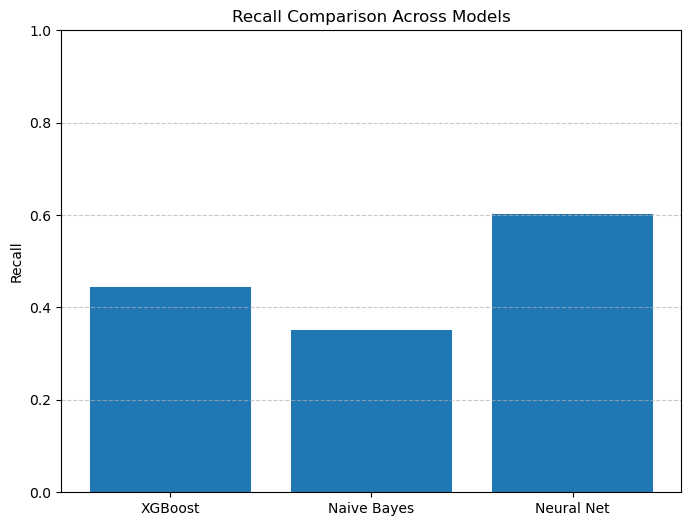

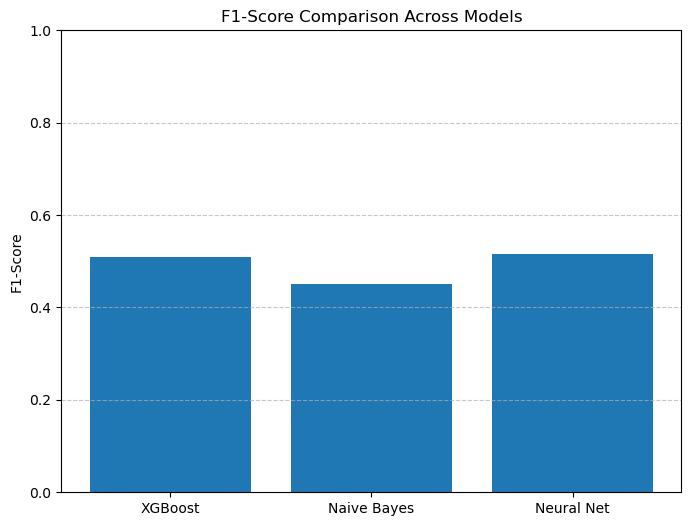

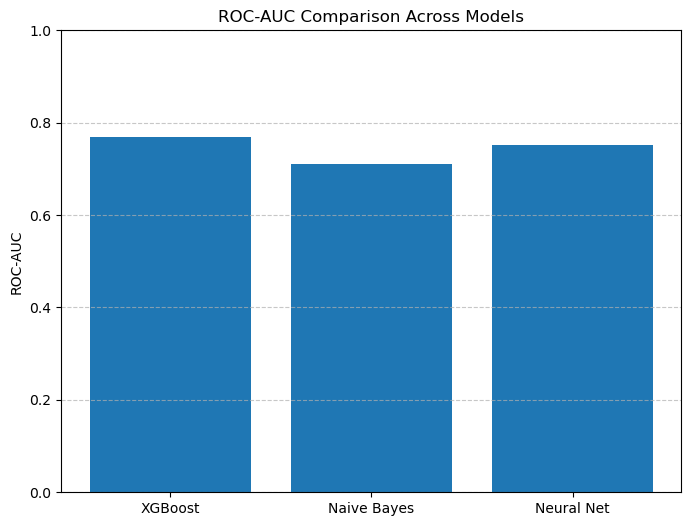

In [7]:
# Plot precision, recall, F1-score, and ROC-AUC
plot_comparison(precisions, "Precision")
plot_comparison(recalls, "Recall")
plot_comparison(f1_scores, "F1-Score")
plot_comparison(roc_auc_scores, "ROC-AUC")

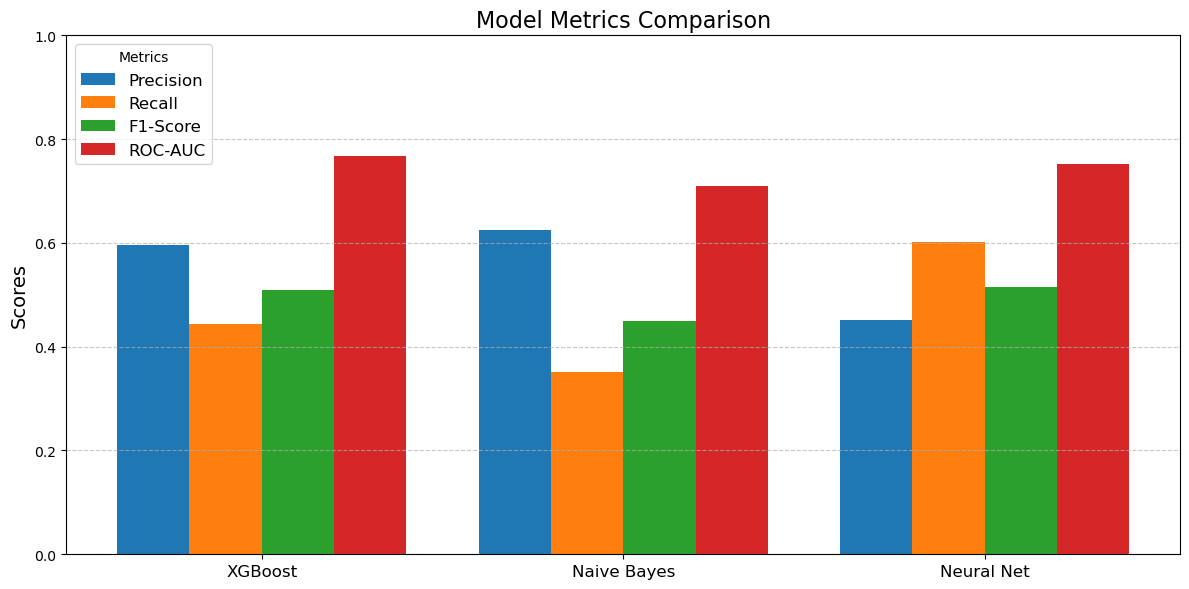

In [8]:
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = [precisions, recalls, f1_scores, roc_auc_scores]

# Label locations and width
x = np.arange(len(models)) 
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each metric
for i, (metric, metric_values) in enumerate(zip(metrics, values)):
    ax.bar(x + i * width, metric_values, width, label=metric)

# Setting labels
ax.set_title('Model Metrics Comparison', fontsize=16)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylabel('Scores', fontsize=14)
ax.set_ylim(0, 1.0)
ax.legend(title="Metrics", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()